# Maestría en Inteligencia Artificial Aplicada
## Curso: Proyecto Integrador
### Tecnológico de Monterrey

# Avance 1. Análisis exploratorio de datos

####**Variables**

Los datos se extrajeron de la plataforma: https://portal.satrack.com/ para la flota de asfalto del 24/04/2024 - 30/04/2024.

Hay **17** variables en el dataset descargado:

* Vehículo - Placa del tractocamión que realiza la ruta
* Estado - Estado del GPS conectado al tractocamión (Alarma, Apagado, Detenido, Detenido-Ralenti, Movimiento)
* Tipo de Evento - Detalle del tractocamión de acuerdo al estado
* Fecha GPS - Fecha en la que se esta realizando la captura del dato
* Hora GPS - Hora en formato 24 horas en la que se esta realizando la captura del dato
* Ubicación - Detalle de Calle, Carrera, Comuna/Vereda, Municipio, Departamento
* Velocidad - Velocidad detectada por el GPS en km/h
* Odómetro - Kilometraje recorrido
* Longitud - Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.
* Latitud - Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.
* Sentido - Sentido de la ruta
* Fecha Sistema - Fecha en la cual se ingresa la información en la Base de Datos
* Hora Sistema - Hora en la cual se ingresa la información en la Base de Datos
* Temperatura - Temperatura del tractocamión
* Estado de la Puerta - Estado de la puerta
* Edad del dato - Estado del dato en el sistema (Nueva, Vieja)
* Nivel de Batería - Nivel de la Batería del tractocamión




## 0. Importamos librerías básicas

In [4]:
# Importamos librerías pandas, numpy y re
import re
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm import tqdm
from shapely.geometry import Point
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## 1. Cargamos los datos.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Importamos dataset
link_archivo = "/content/Detalle_Semanal_Asfalto.csv"
#link_archivo = "/content/drive/MyDrive/Trimestre VII/Proyecto Integrador/Detalle_Semanal_Asfalto.csv"
df_original = pd.read_csv(link_archivo, delimiter=';', encoding = "UTF-8", encoding_errors='ignore' )

In [6]:
df = df_original.copy()

## 2. Exploramos la estructuras del df, como columnas y tipo de datos, contenido de las filas, tipo de datos, etc.

In [ ]:
# Obtenemos una pequeña impresión sobre el contenido de nuestra información
df.head()

,Vehículo,Estado,Tipo de Evento,Fecha GPS,Hora GPS,Ubicación,Velocidad (km/h),Odómetro,Longitud,Latitud,Sentido,Fecha Sistema,Hora Sistema,Temperatura,Estado de la puerta,Edad del dato,Nivel de Batería
0,LCN410,Apagado,Tiempo Vehículo apagado,2024/04/24,00:17:17 AM,"Tv 49, 57, San Martín, Comuna 6, Barrancaberme...",0,308144,-73.82349,7.07423,Norte,2024/04/24,00:18:43 AM,-,-,Nueva,-
1,LCN410,Apagado,Tiempo Vehículo apagado,2024/04/24,00:19:17 AM,"Tv 49, 57, San Martín, Comuna 6, Barrancaberme...",0,308144,-73.82349,7.07423,Norte,2024/04/24,00:19:56 AM,-,-,Nueva,-
2,LCN410,Apagado,Tiempo Vehículo apagado,2024/04/24,00:30:14 AM,"Tv 49, 57, San Martín, Comuna 6, Barrancaberme...",0,308144,-73.82351,7.07424,Norte,2024/04/24,00:30:54 AM,-,-,Nueva,-
3,LCN410,Apagado,Tiempo Vehículo apagado,2024/04/24,00:48:10 AM,"Tv 49, 57, San Martín, Comuna 6, Barrancaberme...",0,308144,-73.82350,7.07423,Norte,2024/04/24,00:48:51 AM,-,-,Nueva,-
4,LCN410,Apagado,Tiempo Vehículo apagado,2024/04/24,00:50:09 AM,"Tv 49, 57, San Martín, Comuna 6, Barrancaberme...",0,308144,-73.82349,7.07422,Norte,2024/04/24,00:50:35 AM,-,-,Nueva,-


In [ ]:
# Vemos las dimensiones de nuestro df en (filas, columnas)
df.shape

(220478, 17)

In [ ]:
# Exploramos la columnas del df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220478 entries, 0 to 220477
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Vehículo             220478 non-null  object 
 1   Estado               220478 non-null  object 
 2   Tipo de Evento       220478 non-null  object 
 3   Fecha GPS            220478 non-null  object 
 4   Hora GPS             220478 non-null  object 
 5   Ubicación            220478 non-null  object 
 6   Velocidad (km/h)     220478 non-null  int64  
 7   Odómetro             220478 non-null  int64  
 8   Longitud             220478 non-null  float64
 9   Latitud              220478 non-null  float64
 10  Sentido              220478 non-null  object 
 11  Fecha Sistema        220478 non-null  object 
 12  Hora Sistema         220478 non-null  object 
 13  Temperatura          220478 non-null  object 
 14  Estado de la puerta  220478 non-null  object 
 15  Edad del dato    

In [ ]:
# Convertimos los tipos de datos que no tienen el formato adecuado
df['Fecha GPS'] = pd.to_datetime(df['Fecha GPS'])
#df['Hora GPS'] = df['Hora GPS'].str.replace(' AM', '').str.replace(' PM', '')
#df['Hora GPS'] = pd.to_datetime(df['Hora GPS'], format='%H:%M:%S').dt.time
df['Fecha Sistema'] = pd.to_datetime(df['Fecha Sistema'])
#df['Hora Sistema'] = df['Hora Sistema'].str.replace(' AM', '').str.replace(' PM', '')
#df['Hora Sistema'] = pd.to_datetime(df['Hora Sistema'], format='%H:%M:%S').dt.time

#df.head()
df.dtypes


Vehículo                       object
Estado                         object
Tipo de Evento                 object
Fecha GPS              datetime64[ns]
Hora GPS                       object
Ubicación                      object
Velocidad (km/h)                int64
Odómetro                        int64
Longitud                      float64
Latitud                       float64
Sentido                        object
Fecha Sistema          datetime64[ns]
Hora Sistema                   object
Temperatura                    object
Estado de la puerta            object
Edad del dato                  object
Nivel de Batería               object
dtype: object

In [ ]:
#df = df_original.copy()

## 3. Análisis de datos nulos o faltantes, e información inconsistente.

Como notamos arriba en la inspección de campos o columnas, nos percatamos que ninguno posee valores nulos. Podemos corroborar de todas formas con el método `.isna()` o `.isnull()`.

In [ ]:
# Vemos si hay valores nulos
df.isnull().sum()

Vehículo               0
Estado                 0
Tipo de Evento         0
Fecha GPS              0
Hora GPS               0
Ubicación              0
Velocidad (km/h)       0
Odómetro               0
Longitud               0
Latitud                0
Sentido                0
Fecha Sistema          0
Hora Sistema           0
Temperatura            0
Estado de la puerta    0
Edad del dato          0
Nivel de Batería       0
dtype: int64

Observamos que no hay datos nulos, pero explorando datos en Excel, nos percatamos de que hay muchas columnas que tienen como información un guión `(-)`, en esos casos esos guiones pueden ser valores nulos o responden a un estado de otra columna en específico.

Creamos una tabla con **valores únicos** para analizar qué columnas hacen ruido en nuestro df y podamos descartarlas.

In [ ]:
# Diccionario de mapeo para reemplazar las vocales con tilde
map_dict = {'á': 'a', 'é': 'e', 'í': 'i', 'ó': 'o', 'ú': 'u'}

# Hacemos limpieza en la columna Tipo de Evento que tiene algunas características repetidas
df['Tipo de Evento'] = df['Tipo de Evento'].str.lower()
df['Tipo de Evento'] = df['Tipo de Evento'].str.replace('-', '')
df['Tipo de Evento'] = df['Tipo de Evento'].str.replace('[^\w\s]', '')
df['Tipo de Evento'] = df['Tipo de Evento'].str.strip()

# Reemplaza las vocales con tilde
df['Tipo de Evento'] = df['Tipo de Evento'].replace(map_dict, regex=True)


In [ ]:
from IPython.display import display, Markdown

# Visualizamos datos únicos por algunas columnas categóricas y otras por analizar
columnas = ['Estado', 'Tipo de Evento', 'Sentido', 'Temperatura', 'Estado de la puerta', 'Edad del dato', 'Nivel de Batería']

display(Markdown(f'**Valores únicos de las columnas:** </br></br>'))

for columna in columnas:
    valores_unicos = df[columna].unique()
    display(Markdown(f'**{columna}:**'))
    print(valores_unicos)
    #print("\n")  # Agrega una línea en blanco para mejorar la legibilidad

**Valores únicos de las columnas:** </br></br>

**Estado:**

['Apagado' 'Detenido-Ralenti' 'Movimiento' 'Detenido' 'Alarma']


**Tipo de Evento:**

['tiempo vehiculo apagado' 'vehiculo encendido'
 'tiempo vehiculo encendido' 'termino exceso de velocidad'
 'reporte por tiempo' 'frenada brusca' 'respuesta interrogacion'
 'vehiculo apagado' 'bateria principal desconectada'
 'bateria principal conectada' 'boton de panico'
 'deteccion de intermitencia anomala (dia)' 'aceleracion brusca'
 'alarma por tiempo de vehiculo detenido' 'giro repentino'
 'cierre de puerta' 'apertura de puerta']


**Sentido:**

['Norte' 'Sur' 'Oriente' 'Sur-Oriente' 'Nor-Oriente' 'Nor-Occidente'
 'Occidente' 'Sur-Occidente' '-']


**Temperatura:**

['-']


**Estado de la puerta:**

['-' 'Cerrada' 'Abierta']


**Edad del dato:**

['Nueva' 'Vieja']


**Nivel de Batería:**

['-' '0']


Podemos **descartar** del df los campos **Nivel de Batería** y **Temperatura**, ya que vemos que no poseen información alguna. Podemos observar también que las columnas **Sentido** y **Estado de la puerta** poseen información de sus categorías, pero adicionalmente tienen valores con guiones `(-)` y debemos averiguar qué quieren decir esos guiones.

In [ ]:
# Analizamos la columna sentido y vemos cuantos valores únicos hay con guión (-)
df_guion = df[df['Sentido'].eq('-')]
num_valores_guion = len(df_guion)
print(f'Número de valores que son "-" exactamente en la columna "Sentido": {num_valores_guion}')

Número de valores que son "-" exactamente en la columna "Sentido": 4


In [ ]:
# Filtramos la columna Sentido con el -
df_filtrado = df[df['Sentido'] == '-']
df_filtrado

,Vehículo,Estado,Tipo de Evento,Fecha GPS,Hora GPS,Ubicación,Velocidad (km/h),Odómetro,Longitud,Latitud,Sentido,Fecha Sistema,Hora Sistema,Temperatura,Estado de la puerta,Edad del dato,Nivel de Batería
40292,LCO725,Alarma,deteccion de intermitencia anomala (dia),2024-04-24,18:24:11 PM,"Vía a San Alberto, Sabana de Torres, Santander",0,0,-73.543149,7.412056,-,2024-04-24,23:24:11 PM,-,-,Nueva,-
40301,LCO725,Alarma,deteccion de intermitencia anomala (dia),2024-04-24,18:32:13 PM,"Vía a San Alberto, Sabana de Torres, Santander",0,0,-73.543149,7.412056,-,2024-04-24,23:32:13 PM,-,-,Nueva,-
195611,XFA351,Alarma,deteccion de intermitencia anomala (dia),2024-04-28,08:24:10 AM,"Vía Santa Cecilia - Autopista, Barrancabermeja...",0,0,-73.807150,7.060260,-,2024-04-28,13:24:10 PM,-,-,Nueva,-
195612,XFA351,Alarma,deteccion de intermitencia anomala (dia),2024-04-28,08:32:11 AM,"Vía Santa Cecilia - Autopista, Barrancabermeja...",0,0,-73.807150,7.060260,-,2024-04-28,13:32:11 PM,-,-,Nueva,-


In [ ]:
# Analizamos la columna Estado de la puerta y vemos cuantos valores únicos hay con guión (-)
df_guion_2 = df[df['Estado de la puerta'].eq('-')]
num_valores_guion_2 = len(df_guion_2)
print(f'Número de valores que son "-" exactamente en la columna "Estado de la puerta": {num_valores_guion_2}')

# Al ver que son bastantes registros con guiones procedemos a ver la totalidad de registros del df
print("\nDimensiones del df: ", df.shape)

# Miramos qué proporción de de guiones en la columna
proporcion = num_valores_guion_2 / df.shape[0]

print(f'\nLa proporción de valores que son "-" en la columna "Estado de la puerta" es: {round(proporcion * 100, 2)}%')

Número de valores que son "-" exactamente en la columna "Estado de la puerta": 220375

Dimensiones del df:  (220478, 17)

La proporción de valores que son "-" en la columna "Estado de la puerta" es: 99.95%


Para el campo **Sentido**: Logramos observar que los guiones `(-)` solamente son 4 y coinciden  con la categoría ***Alarma*** del campo **Estado** y con `0` en el campo **Velocidad (km/h)** como campos relavantes para comparar. Se podría considerar colocar una nueva categoría que reemplace ese `(-)` en el campo **Sentido**, o descartar estos 4 ítems.
</br></br>
Para el campo **Estado de la puerta**: Logramos observar que los guiones `(-)` corresponden al 99.95% de la totalidad de los datos. Por lo cuál, sería otra columna a descartar del dataset ya que no ofrece información valiosa.

In [ ]:
# Eliminamos las variables a  no tener en cuenta
df = df.drop(['Edad del dato', 'Nivel de Batería', 'Temperatura', 'Estado de la puerta'], axis=1)

# Eliminamos los 4 registros "-" de la variable Sentido
df = df[df['Sentido'] != '-']

## 4. Estadística Descriptiva Básica y Visuzalización de Datos

In [ ]:
df[['Velocidad (km/h)', 'Odómetro', 'Longitud', 'Latitud']].describe()

,Velocidad (km/h),Odómetro,Longitud,Latitud
count,220474.000000,220474.000000,220474.000000,220474.000000
mean,35.310381,214825.353996,-73.877299,8.676987
std,29.303744,150342.777174,0.457473,1.641289
min,0.000000,0.000000,-75.688608,2.435849
25%,0.000000,119240.000000,-74.102200,7.123870
50%,40.000000,161737.000000,-73.792149,8.525225
75%,63.000000,298490.000000,-73.578838,10.153965
max,134.000000,824200.000000,-72.265980,11.737530


Podemos ver que todas las variables númericas tienen comportamiento **bimodal**, lo cual puede implicar aplicar alguna técnica de procesado de los mismos.

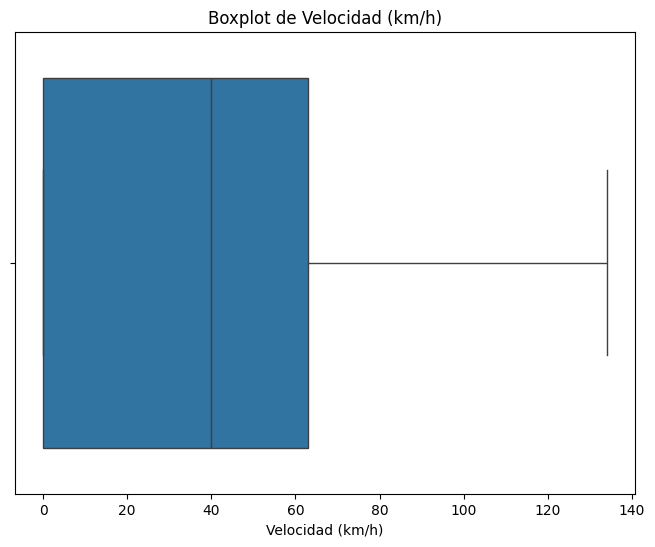

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Velocidad (km/h)'])
plt.title('Boxplot de Velocidad (km/h)')
plt.show()

In [ ]:
df['Estado'].value_counts()

Estado
Movimiento          151883
Detenido-Ralenti     49496
Apagado              13813
Detenido              5282
Name: count, dtype: int64

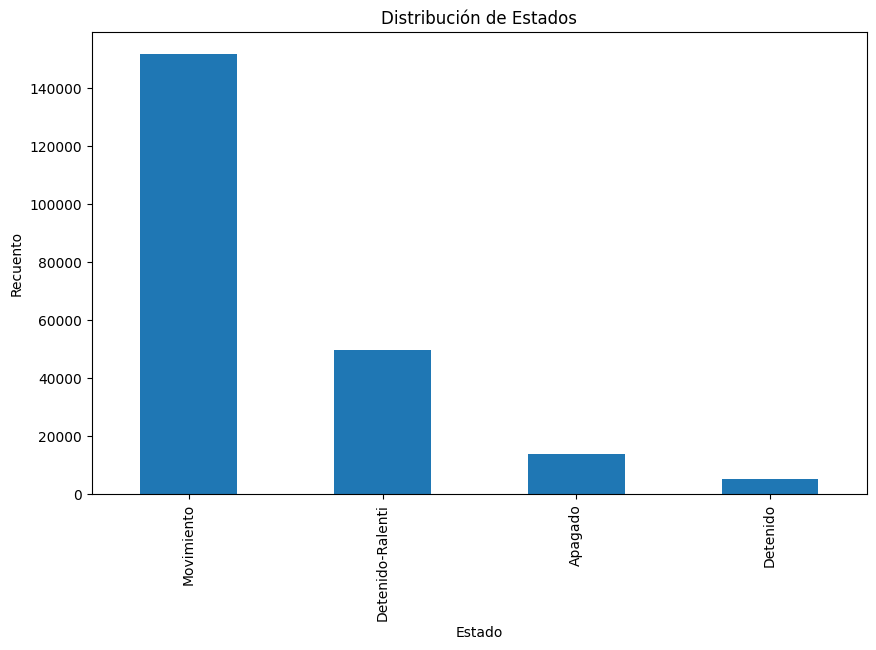

In [ ]:
plt.figure(figsize=(10, 6))
df['Estado'].value_counts().plot(kind='bar')
plt.title('Distribución de Estados')
plt.xlabel('Estado')
plt.ylabel('Recuento')
plt.show()

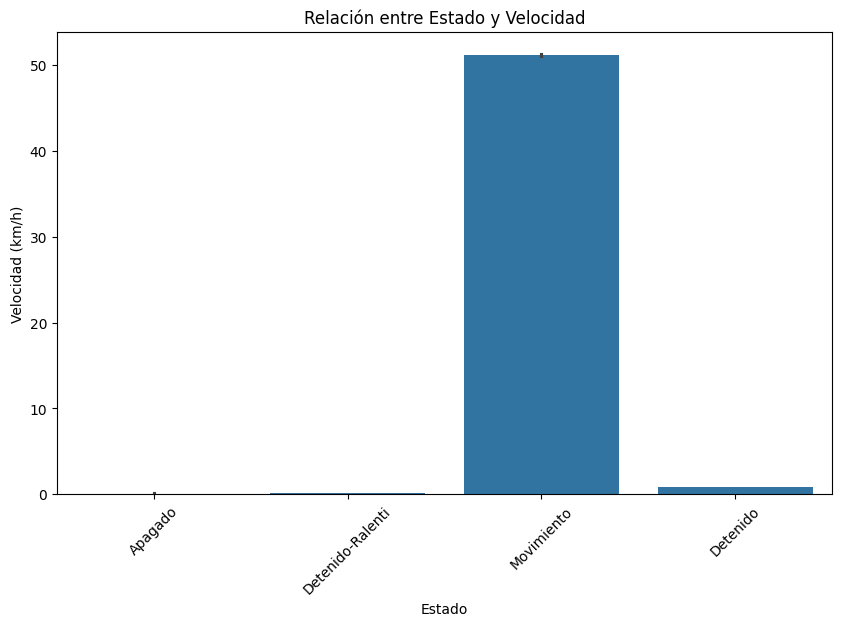

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Estado', y='Velocidad (km/h)', data=df)
plt.title('Relación entre Estado y Velocidad')
plt.xlabel('Estado')
plt.ylabel('Velocidad (km/h)')
plt.xticks(rotation=45)
plt.show()

## 5. Relación entre dos o más variables

In [ ]:
# Analizamos la correlación de las variables numericas
corr = df[['Velocidad (km/h)', 'Odómetro', 'Longitud', 'Latitud']].corr().round(2)

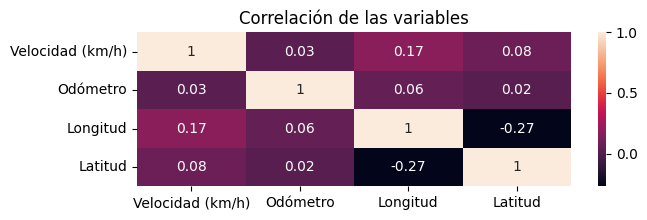

In [ ]:
plt.figure(figsize=(7,2))
sns.heatmap(corr,annot=True)
plt.title("Correlación de las variables")
plt.show()

Se identifica que las variables con mayor relación positiva son: Velocidad (km/h) y Longitud, y, las variables con mayor relación negativa son: Longitud y Latitud.

## 6. Patrones o agrupaciones

In [ ]:
df["Coordenadas"] = list(zip(df.Longitud, df.Latitud))
df["Coordenadas"] = df["Coordenadas"].apply(Point)
df.head()

,Vehículo,Estado,Tipo de Evento,Fecha GPS,Hora GPS,Ubicación,Velocidad (km/h),Odómetro,Longitud,Latitud,Sentido,Fecha Sistema,Hora Sistema,Coordenadas
0,LCN410,Apagado,tiempo vehiculo apagado,2024-04-24,00:17:17 AM,"Tv 49, 57, San Martín, Comuna 6, Barrancaberme...",0,308144,-73.82349,7.07423,Norte,2024-04-24,00:18:43 AM,POINT (-73.82349 7.07423)
1,LCN410,Apagado,tiempo vehiculo apagado,2024-04-24,00:19:17 AM,"Tv 49, 57, San Martín, Comuna 6, Barrancaberme...",0,308144,-73.82349,7.07423,Norte,2024-04-24,00:19:56 AM,POINT (-73.82349 7.07423)
2,LCN410,Apagado,tiempo vehiculo apagado,2024-04-24,00:30:14 AM,"Tv 49, 57, San Martín, Comuna 6, Barrancaberme...",0,308144,-73.82351,7.07424,Norte,2024-04-24,00:30:54 AM,POINT (-73.82351 7.07424)
3,LCN410,Apagado,tiempo vehiculo apagado,2024-04-24,00:48:10 AM,"Tv 49, 57, San Martín, Comuna 6, Barrancaberme...",0,308144,-73.82350,7.07423,Norte,2024-04-24,00:48:51 AM,POINT (-73.8235 7.07423)
4,LCN410,Apagado,tiempo vehiculo apagado,2024-04-24,00:50:09 AM,"Tv 49, 57, San Martín, Comuna 6, Barrancaberme...",0,308144,-73.82349,7.07422,Norte,2024-04-24,00:50:35 AM,POINT (-73.82349 7.07422)


In [ ]:
# Creamos la característica de Coordenadas
gdf = gpd.GeoDataFrame(df, geometry="Coordenadas")
gdf.head()

,Vehículo,Estado,Tipo de Evento,Fecha GPS,Hora GPS,Ubicación,Velocidad (km/h),Odómetro,Longitud,Latitud,Sentido,Fecha Sistema,Hora Sistema,Coordenadas
0,LCN410,Apagado,tiempo vehiculo apagado,2024-04-24,00:17:17 AM,"Tv 49, 57, San Martín, Comuna 6, Barrancaberme...",0,308144,-73.82349,7.07423,Norte,2024-04-24,00:18:43 AM,POINT (-73.82349 7.07423)
1,LCN410,Apagado,tiempo vehiculo apagado,2024-04-24,00:19:17 AM,"Tv 49, 57, San Martín, Comuna 6, Barrancaberme...",0,308144,-73.82349,7.07423,Norte,2024-04-24,00:19:56 AM,POINT (-73.82349 7.07423)
2,LCN410,Apagado,tiempo vehiculo apagado,2024-04-24,00:30:14 AM,"Tv 49, 57, San Martín, Comuna 6, Barrancaberme...",0,308144,-73.82351,7.07424,Norte,2024-04-24,00:30:54 AM,POINT (-73.82351 7.07424)
3,LCN410,Apagado,tiempo vehiculo apagado,2024-04-24,00:48:10 AM,"Tv 49, 57, San Martín, Comuna 6, Barrancaberme...",0,308144,-73.82350,7.07423,Norte,2024-04-24,00:48:51 AM,POINT (-73.82350 7.07423)
4,LCN410,Apagado,tiempo vehiculo apagado,2024-04-24,00:50:09 AM,"Tv 49, 57, San Martín, Comuna 6, Barrancaberme...",0,308144,-73.82349,7.07422,Norte,2024-04-24,00:50:35 AM,POINT (-73.82349 7.07422)


In [ ]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")
world.head()

<ipython-input-190-8d61362a6d0f>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,889953.0,Oceania,Fiji,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,58005463.0,Africa,Tanzania,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253.0,Africa,W. Sahara,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,37589262.0,North America,Canada,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,328239523.0,North America,United States of America,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [ ]:
#Verificamos Colombia
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

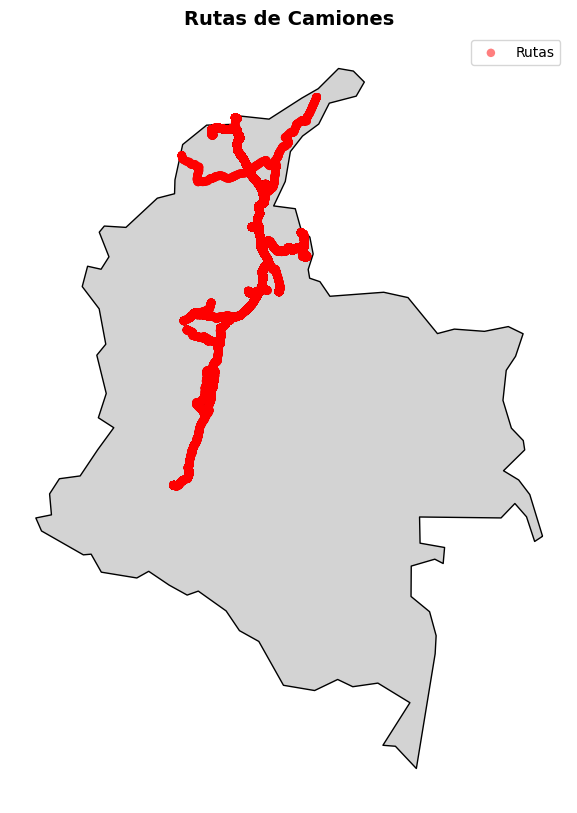

In [ ]:
"""fig, gax = plt.subplots(figsize=(10,10))
world.query("name == 'Colombia'").plot(ax=gax, edgecolor='black',color='white')
gax.set_xlabel('Longitud')
gax.set_ylabel('Latitud')
gdf.plot(ax=gax, color='red', alpha = 0.5)
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)"""

fig, gax = plt.subplots(figsize=(10,10))

# Dibujamos el mapa de Colombia
world.query("name == 'Colombia'").plot(ax=gax, edgecolor='black', color='lightgrey')

# Configuramos los nombres de los ejes
#gax.set_xlabel('Longitud', fontsize=12, fontweight='bold')
#gax.set_ylabel('Latitud', fontsize=12, fontweight='bold')

# Dibujamos los datos en el gráfico
#gdf.plot(ax=gax, color='red', alpha=0.5, label='Rutas')
gdf.plot(ax=gax, color='red', alpha=0.5, label='Rutas', linewidth=0.1, linestyle='--')
# Eliminamos los bordes superior y derecho
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)
# Hacemos que los ejes no sean visibles
gax.set_xticks([])
gax.set_yticks([])
# Añadimos un título al gráfico
gax.set_title('Rutas de Camiones', fontsize=14, fontweight='bold')
# Añadimos la leyenda
gax.legend()
# Eliminamos completamente los ejes X e Y
gax.axis('off')
# Mostramos el gráfico
plt.show()

Se verifica que no existen valores atíppicos respecto a la Latitud y Longitud. Adicional, se encuentra el patron de las rutas respecto a estas variables.

# Avance 2. Ingeniería de Características

## Discretización o binning
Se decide no realizar discretización sobre ninguna variables con el fin de no tener pérdida de información.

## Codificación de variables categóricas
En este paso se define codificar las variables categóricas para usarlas en el modelo.
Realizamos pruebas con pandas, scikit-learn y feature-engine para escoger la mejor opción entre One-Hot enconding y Label encoding. No se tuvo  en cuenta la realización de codificación de categorias frecuentes y sustitución de categorias por recuentos con el fin de no perder la precisión de los datos. Adicional, la sustitución de categorías por números ordinales no se realizó dado que no se tiene conocimiento si el modelo será lineal y no hay jerarquía en las variables.


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Codificamos con Label Encoding las variables deseadas
df['Vehiculo_encoded'] = le.fit_transform(df['Vehículo'])
df['Estado_encoded'] = le.fit_transform(df['Estado'])
df['Sentido_encoded'] = le.fit_transform(df['Sentido'])
df['Ubicacion_encoded'] = le.fit_transform(df['Ubicación'])
df['Odometro_encoded'] = le.fit_transform(df['Odómetro'])
df['Latitud_encoded'] = le.fit_transform(df['Latitud'])
df['Longitud_encoded'] = le.fit_transform(df['Longitud'])


In [ ]:
# Obtener One-Hot Encoding para la columna Tipo de Evento
tipo_evento_encoded = pd.get_dummies(df['Tipo de Evento'], prefix='Tipo_Evento')

# Unir las nuevas columnas al DataFrame original
df = pd.concat([df, tipo_evento_encoded], axis=1)


In [ ]:
df.head()

,Vehículo,Estado,Tipo de Evento,Fecha GPS,Hora GPS,Ubicación,Velocidad (km/h),Odómetro,Longitud,Latitud,...,Tipo_Evento_cierre de puerta,Tipo_Evento_frenada brusca,Tipo_Evento_giro repentino,Tipo_Evento_reporte por tiempo,Tipo_Evento_respuesta interrogacion,Tipo_Evento_termino exceso de velocidad,Tipo_Evento_tiempo vehiculo apagado,Tipo_Evento_tiempo vehiculo encendido,Tipo_Evento_vehiculo apagado,Tipo_Evento_vehiculo encendido
0,LCN410,Apagado,tiempo vehiculo apagado,2024-04-24,00:17:17 AM,"Tv 49, 57, San Martín, Comuna 6, Barrancaberme...",0,308144,-73.82349,7.07423,...,False,False,False,False,False,False,True,False,False,False
1,LCN410,Apagado,tiempo vehiculo apagado,2024-04-24,00:19:17 AM,"Tv 49, 57, San Martín, Comuna 6, Barrancaberme...",0,308144,-73.82349,7.07423,...,False,False,False,False,False,False,True,False,False,False
2,LCN410,Apagado,tiempo vehiculo apagado,2024-04-24,00:30:14 AM,"Tv 49, 57, San Martín, Comuna 6, Barrancaberme...",0,308144,-73.82351,7.07424,...,False,False,False,False,False,False,True,False,False,False
3,LCN410,Apagado,tiempo vehiculo apagado,2024-04-24,00:48:10 AM,"Tv 49, 57, San Martín, Comuna 6, Barrancaberme...",0,308144,-73.82350,7.07423,...,False,False,False,False,False,False,True,False,False,False
4,LCN410,Apagado,tiempo vehiculo apagado,2024-04-24,00:50:09 AM,"Tv 49, 57, San Martín, Comuna 6, Barrancaberme...",0,308144,-73.82349,7.07422,...,False,False,False,False,False,False,True,False,False,False


## Escalamiento de variables

Escalamos las variables numéricas que tienen distintas escalas y magnitudes.Usamos la **Normalización**, ya que las variables de **Longitud, Latitud, Odómetro y Velocidad**, no tienen una distribución normal que en ese caso se recomienda la **Estandarización**.

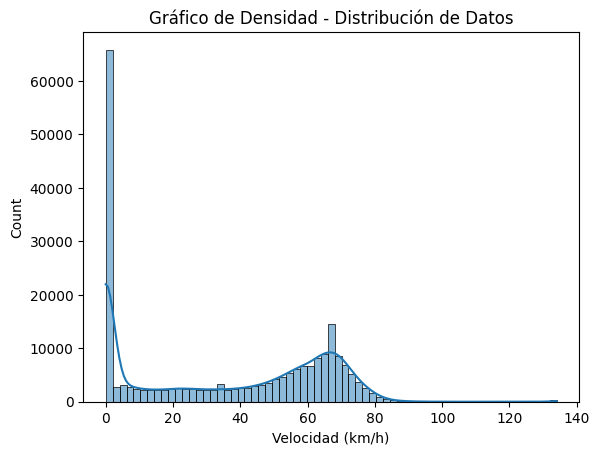

In [ ]:
# Ejemplo de gráfico de densidad para una columna numérica
sns.histplot(data=df, x='Velocidad (km/h)', kde=True)
plt.title('Gráfico de Densidad - Distribución de Datos')
plt.show()

In [ ]:
# Usamos la Normalización
scaler = MinMaxScaler()
df[['Longitud', 'Latitud', 'Odómetro', 'Velocidad (km/h)']] = scaler.fit_transform(df[['Longitud', 'Latitud', 'Odómetro', 'Velocidad (km/h)']])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220474 entries, 0 to 220477
Data columns (total 37 columns):
 #   Column                                              Non-Null Count   Dtype         
---  ------                                              --------------   -----         
 0   Vehículo                                            220474 non-null  object        
 1   Estado                                              220474 non-null  object        
 2   Tipo de Evento                                      220474 non-null  object        
 3   Fecha GPS                                           220474 non-null  datetime64[ns]
 4   Hora GPS                                            220474 non-null  object        
 5   Ubicación                                           220474 non-null  object        
 6   Velocidad (km/h)                                    220474 non-null  float64       
 7   Odómetro                                            220474 non-null  float64       
 8  

## Transformación

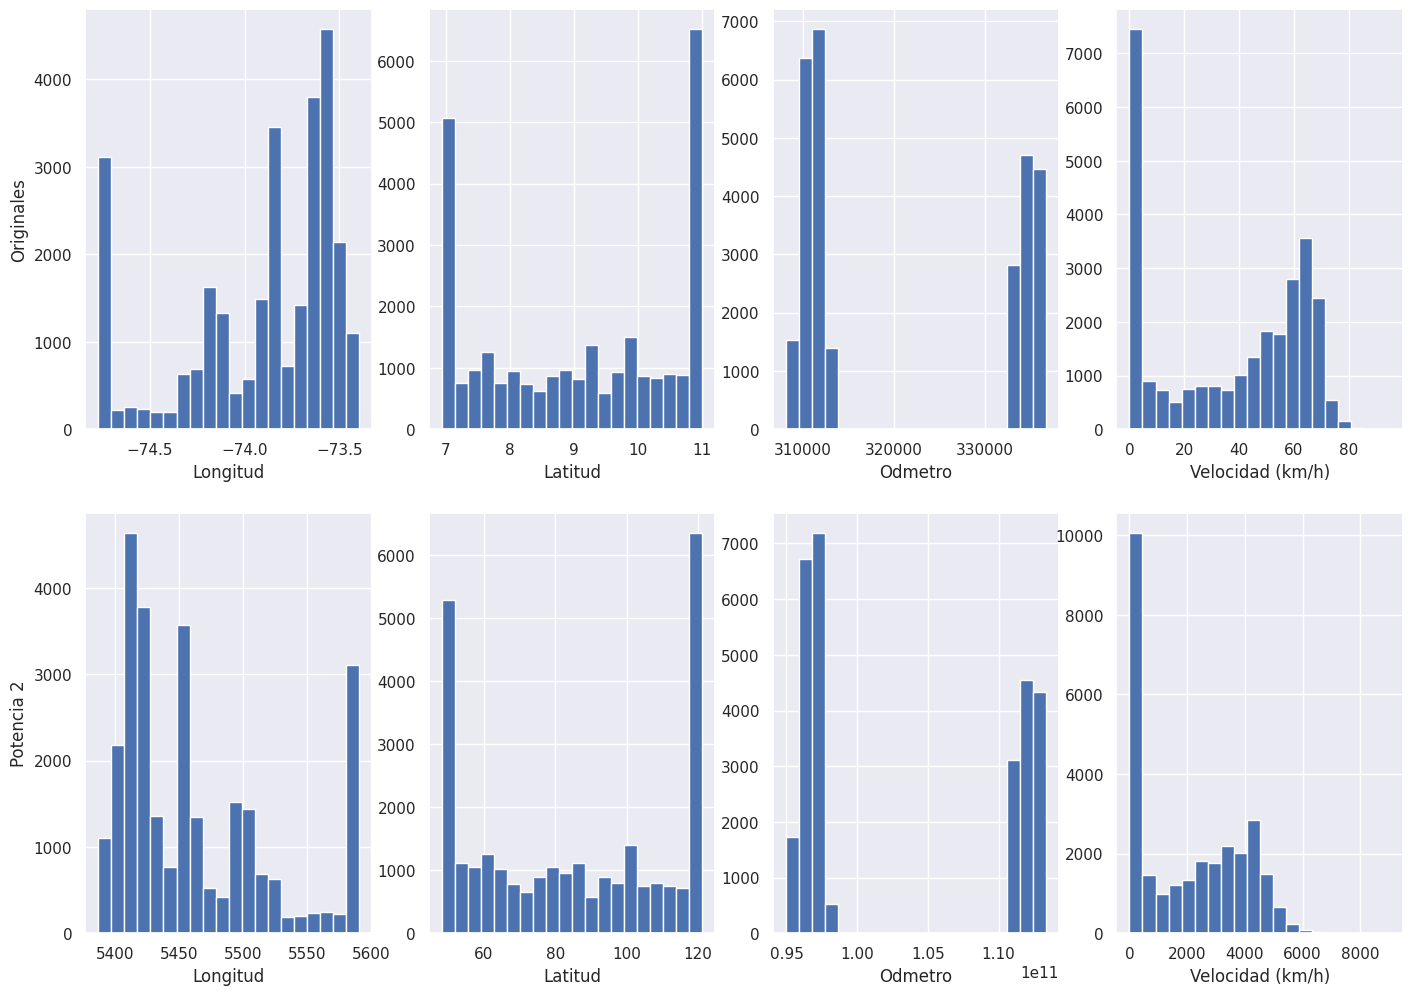

In [18]:
variables_a_transformar = ['Longitud', 'Latitud', 'Odmetro', 'Velocidad (km/h)']


sns.set(rc={'figure.figsize':(17,12)})
fig, axes = plt.subplots(2, 4)

for k in range(0,4):

    # Datos originales ---------------------------------------------------------
    plt.subplot(2,4,k+1)

    Transf0 = df[variables_a_transformar[k]]          #  En esta línea se debe asignar a Transf0 los valores de cada variable "k" sin transformar.
    plt.hist(Transf0, bins =20)                             #  En este línea agrega el comando para obtener el histograma de Transf0 con 20 barras (bins).


    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Originales')

   # Datos transformados con la potencia de 2 ---------------------------------
    plt.subplot(2,4,k+5)

    Transf3 = np.power(Transf0,2)         #  En esta línea debes elevar al cuadrado los valores de cada variable "k" sin transformar.
    plt.hist(Transf3, bins=20)                      #  En este línea agrega el comando para obtener el histograma de Transf3 con 20 barras (bins).


    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Potencia 2')

plt.show()

Se observa que auqnue el comportamiento de los datos originales tienen una forma bimodal e intentar trasnformar los datos, no se encuentra la eliminación del sesgo. Adicional, por los tipos de datos, algunos negativos o cero, no se puede utilizar las trasnformaciones logaritmica, raíz cuadradar y box-cox.

## Tecnicas para la selección de características

In [ ]:
#df['Hora GPS'] = pd.to_datetime(df['Hora GPS'], format='%I:%M:%S %p').dt.time
#df['Hora Sistema'] = pd.to_datetime(df['Hora Sistema'], format='%I:%M:%S %p').dt.time
# Elimina ' AM' y ' PM' de las columnas de hora
df['Hora GPS'] = df['Hora GPS'].str.replace(' AM', '').str.replace(' PM', '')
df['Hora Sistema'] = df['Hora Sistema'].str.replace(' AM', '').str.replace(' PM', '')

# Se convierten las columnas de hora a objetos de tiempo
df['Hora GPS'] = pd.to_datetime(df['Hora GPS'], format='%H:%M:%S').dt.time
df['Hora Sistema'] = pd.to_datetime(df['Hora Sistema'], format='%H:%M:%S').dt.time

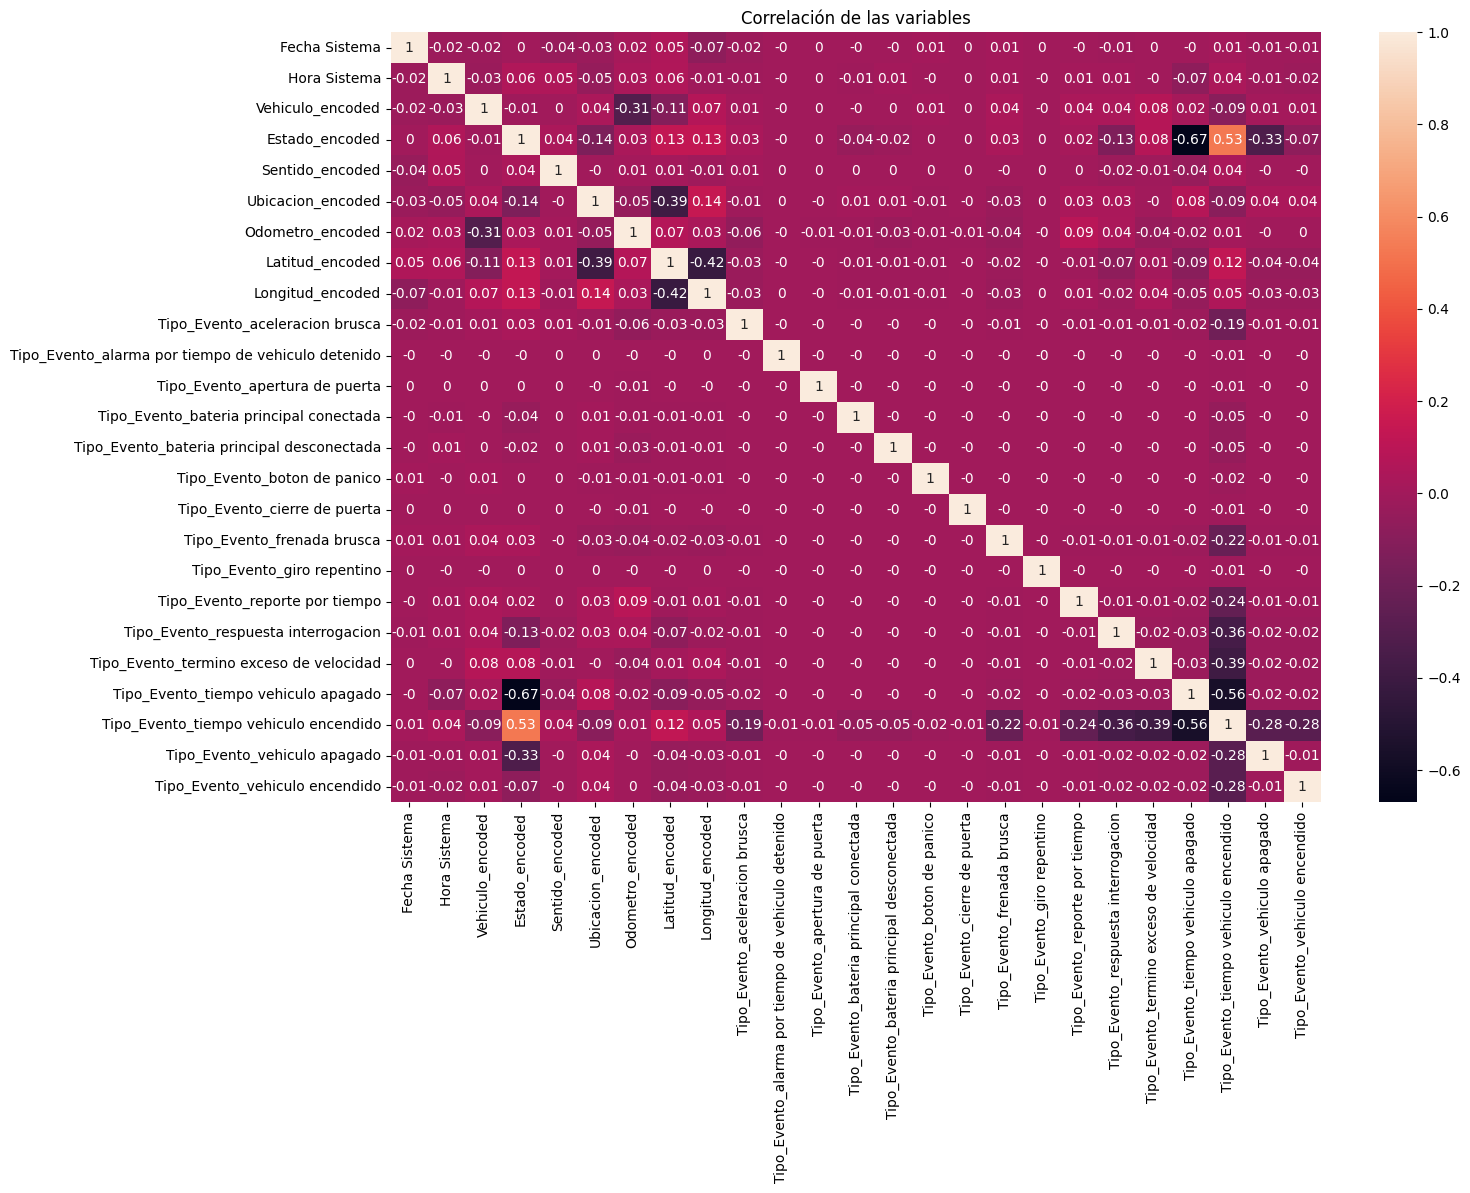

In [ ]:
# Eliminamos las primeras 11 columnas y la columna 'Coordenadas'
df_sin_coordenadas = df.drop(df.columns[range(11)], axis=1).drop('Coordenadas', axis=1)
# Convierte las columnas de tiempo a formato numérico
df_sin_coordenadas['Hora Sistema'] = df_sin_coordenadas['Hora Sistema'].apply(lambda x: x.hour*3600 + x.minute*60 + x.second)

# Hacemos un gráfico de la correlación y las variables que fueron codificadas y escaladas
correlacion = df_sin_coordenadas.corr().round(2)
plt.figure(figsize=(15, 10))
sns.heatmap(correlacion, annot=True)
plt.title("Correlación de las variables")
plt.show()

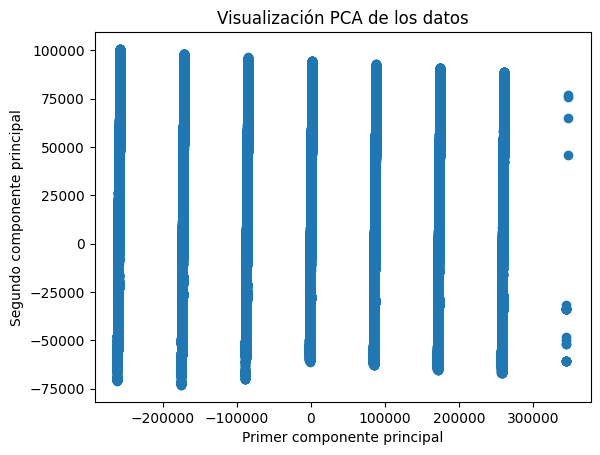

In [ ]:
from sklearn.decomposition import PCA

# Convierte las columnas de fecha y hora a formato numérico
df_sin_coordenadas['Fecha Sistema'] = df_sin_coordenadas['Fecha Sistema'].apply(lambda x: x.timestamp())
#df_sin_coordenadas['Hora Sistema'] = df_sin_coordenadas['Hora Sistema'].apply(lambda x: x.hour*3600 + x.minute*60 + x.second)

pca = PCA(n_components=2)  # Reducir a 2 dimensiones

X_pca = pca.fit_transform(df_sin_coordenadas)

# Visualizamos los datos en 2 dimensiones
plt.scatter(X_pca[:, 0], X_pca[:, 1])

plt.xlabel('Primer componente principal')
plt.ylabel('Segundo componente principal')
plt.title('Visualización PCA de los datos')

plt.show()




## Conclusiones
Se detectó y se realizó la corrección de los errores de los datos disponibles. Adicional, se codificaron las variables categoricas con one-hot y label encoding.
Se realizó la normalización de los datos para mitigar el riesgo de sesgo en el modelo.